In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score, fbeta_score, make_scorer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, classification_report, fbeta_score, confusion_matrix, make_scorer

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [ ]:
X = pd.read_csv('/content/X_dataframe.csv')

Y = pd.read_csv('/content/Y_dataframe.csv')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.10, random_state=369)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,5.359242,-0.902798,0.497903,1.053821,4.447401,0.785371,0.002853,0.381930,-0.133265,-0.655521
1,5.808089,-0.090118,-0.664655,-1.401100,-0.275170,0.631288,-0.460470,0.010982,-0.833993,-0.491362
2,4.551702,3.106753,-1.117574,0.401055,-0.814695,-0.697944,0.172372,-0.133037,-0.086521,0.572512
3,-2.759905,-2.147590,-1.962870,1.902525,-0.790183,-0.661150,0.838318,0.182987,-0.287398,-0.480263
4,-3.270583,1.105067,-1.114905,-0.071695,1.994454,0.494496,-0.083063,0.739865,-0.237818,0.421421


In [ ]:
Y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
best_model = RandomForestClassifier(n_estimators= 161, max_depth= 10, criterion= 'gini')

In [ ]:
best_model.fit(X,Y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=10, n_estimators=161)

In [ ]:
pred = best_model.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


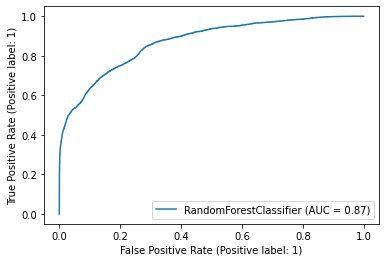

In [ ]:
plot_roc_curve(best_model, X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


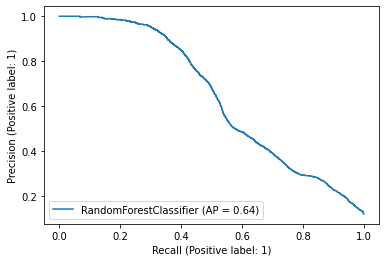

In [ ]:
plot_precision_recall_curve(best_model, X,Y)

In [ ]:
recall_score(Y,pred)

0.35845167201099404

In [ ]:
precision_score(Y,pred)

0.8942857142857142

In [ ]:
import pickle as pkl

filename = f'/content/Random_Forest.pkl'
pkl.dump(best_model, open(filename, 'wb'))

In [ ]:
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [ ]:
model_f2 = RandomForestClassifier(class_weight='balanced')

cv = StratifiedKFold(n_splits=5)

params = {'n_estimators': np.random.randint(100, 1000, 50)}

In [ ]:
grid_f2 = RandomizedSearchCV(estimator=model_f2,
                          param_distributions=params,
                          n_iter=3,
                          scoring='f1',
                          cv=cv)

In [ ]:
model_grid = grid_f2.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
model_grid.best_params_

{'n_estimators': 464}

In [ ]:
model_grid.best_score_

0.23672174251532968

In [ ]:
best_model_f2 = RandomForestClassifier(n_estimators= 464)

In [ ]:
best_model_f2.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=464)

In [ ]:
pred_f2 = best_model_f2.predict(x_test)
plot_roc_curve(best_model_f2, x_test,y_test)
plot_precision_recall_curve(best_model_f2, x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


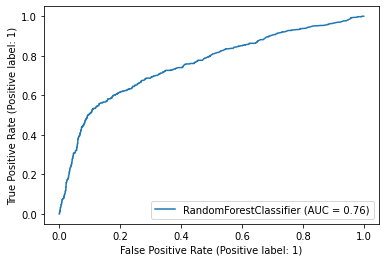

In [ ]:
plot_roc_curve(best_model_f2, x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


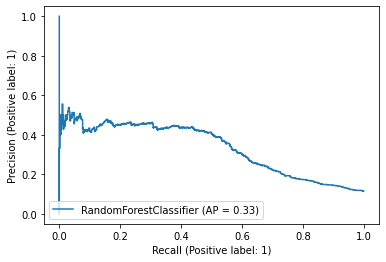

In [ ]:
plot_precision_recall_curve(best_model_f2, x_test,y_test)

In [ ]:
recall_score(y_test,pred_f2)

0.24129930394431554

In [ ]:
precision_score(y_test,pred_f2)

0.45021645021645024

In [ ]:
import pickle as pkl

filename = f'/content/Random_Forest_f2.pkl'
pkl.dump(best_model_f2, open(filename, 'wb'))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier(n_jobs=-1)

params = {'n_estimators': [100,200,300,500]}

In [ ]:
grid = RandomizedSearchCV(estimator=model_xgb,
                                param_distributions=params,
                                n_iter=3,
                                scoring='f1',
                                cv=cv)

In [ ]:
model_grid_xgb = grid_f2.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
model_grid_xgb.best_score_

0.24046868196280288

In [ ]:
model_grid_xgb.best_params_

{'n_estimators': 464}

In [ ]:
model_xgb = XGBClassifier(n_estimators=464)

In [ ]:
model_xgb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(n_estimators=464)

In [ ]:
import pickle as pkl

filename = f'/content/XGBoost_f1.pkl'
pkl.dump(model_xgb, open(filename, 'wb'))

In [ ]:
pred_f2 = best_model_f2.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


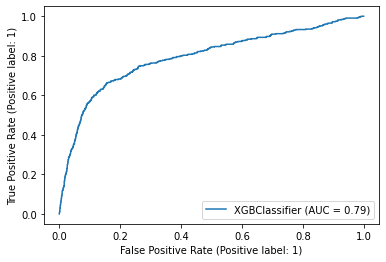

In [ ]:
plot_roc_curve(model_xgb, x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


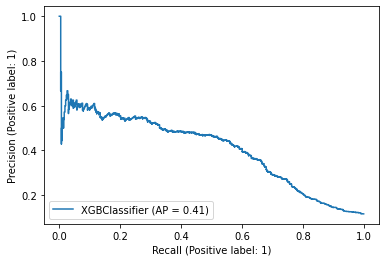

In [ ]:
plot_precision_recall_curve(model_xgb, x_test,y_test)

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
im_model = BalancedRandomForestClassifier(n_estimators=400)

In [ ]:
im_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


BalancedRandomForestClassifier(n_estimators=400)

In [ ]:
im_pred = im_model.predict(x_test)

In [ ]:
accuracy_score(y_test, im_pred)

0.7751875669882101

In [ ]:
recall_score(y_test, im_pred)

0.6821345707656613

In [ ]:
print(classification_report(y_test, im_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      3301
           1       0.30      0.68      0.41       431

    accuracy                           0.78      3732
   macro avg       0.62      0.73      0.64      3732
weighted avg       0.87      0.78      0.81      3732



In [ ]:
confusion_matrix(y_test, im_pred)

array([[2599,  702],
       [ 137,  294]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


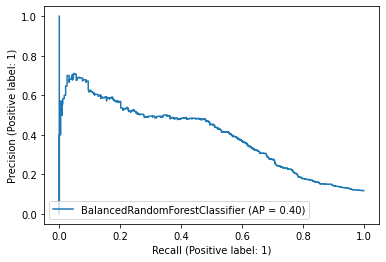

In [ ]:
plot_precision_recall_curve(im_model, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


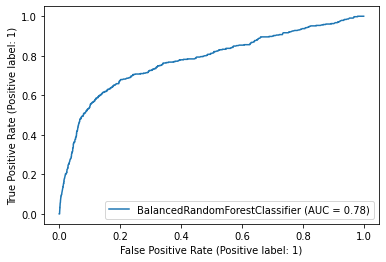

In [ ]:
plot_roc_curve(im_model, x_test, y_test)

In [ ]:
import pickle as pkl

filename = f'/content/RF_imbalanced.pkl'
pkl.dump(im_model, open(filename, 'wb'))

In [ ]:
model_im = BalancedRandomForestClassifier(n_jobs=-1)

params = {'n_estimators': [100,200,300,500,1000,2000],
          'class_weight': ['balanced', 'balanced_subsample'],
          'max_depth': [10,50,100,200,500]}


grid_hal = HalvingRandomSearchCV(estimator=model_im,
                                param_distributions=params,
                                scoring='f1',
                                cv=cv)

model_im_hal = grid_hal.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 60 is smaller than n_iter=1679. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to

In [ ]:
model_im_hal.best_score_

0.32782342954159593

In [ ]:
model_im_hal.best_params_

{'n_estimators': 200, 'max_depth': 100, 'class_weight': 'balanced'}

In [ ]:
mod = BalancedRandomForestClassifier(n_estimators= 200, max_depth=100, class_weight ='balanced')

In [ ]:
mod.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


BalancedRandomForestClassifier(class_weight='balanced', max_depth=100,
                               n_estimators=200)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


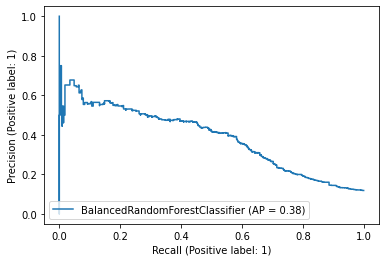

In [ ]:
plot_precision_recall_curve(mod, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


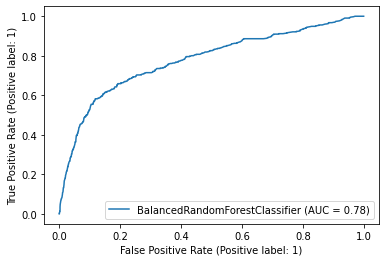

In [ ]:
plot_roc_curve(mod, x_test, y_test)

In [ ]:
import pickle as pkl

filename = f'/content/RF_imbalanced_cv.pkl'
pkl.dump(mod, open(filename, 'wb'))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

weights = np.linspace(0.01, 0.99, 15)

params = {'penalty': ['l2', 'elasticnet'],
          'C': np.linspace(0.001, 10, 50),
          'class_weight': [{0: x, 1: 1.0 - x} for x in weights]}


grid_lr = RandomizedSearchCV(estimator=lr,
                              param_distributions=params,
                              scoring='f1',
                              n_iter = 100,
                              cv=cv)

LR_model = grid_lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
LR_model.best_score_

0.458132566393718

In [ ]:
LR_model.best_params_

{'penalty': 'l2',
 'class_weight': {0: 0.21999999999999997, 1: 0.78},
 'C': 4.694408163265307}

In [ ]:
final_lr = LogisticRegression(**LR_model.best_params_)

In [ ]:
final_lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=4.694408163265307,
                   class_weight={0: 0.21999999999999997, 1: 0.78})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


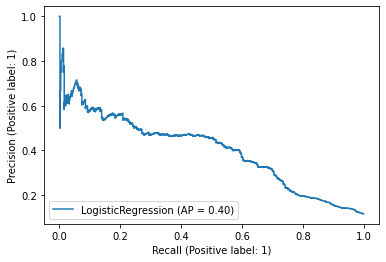

In [ ]:
plot_precision_recall_curve(final_lr, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


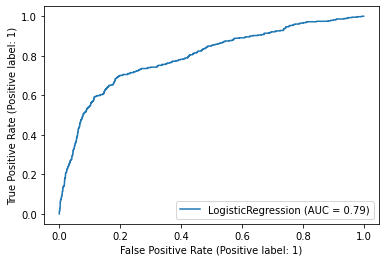

In [ ]:
plot_roc_curve(final_lr, x_test, y_test)

In [ ]:
pred = final_lr.predict(x_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3301
           1       0.45      0.51      0.48       431

    accuracy                           0.87      3732
   macro avg       0.69      0.71      0.70      3732
weighted avg       0.88      0.87      0.87      3732

